# Part III: Advanced data visualisation

![](img/visualization.jpeg)

In this section we'll learn:
- Using [Bokeh](https://bokeh.pydata.org/en/latest/) as a low-level visualisation tool to build arbitrary visualisations
- Creating interactive plots
- Creating animated plots

In [2]:
import pandas

movies = pandas.read_json('data/movie_clean.jsonl.bz2', lines=True)

In [4]:
movies = movies.set_index('imdb_id')

In [93]:
movies.head()

,cast,certificate,genre,gross,image,link,rating,runtime,summary,title,votes,year
imdb_id,,,,,,,,,,,,
tt6173990,"[{'name': 'Reema Kagti', 'link': '/name/nm1030...",12A,"Drama, History, Sport",NaN,https://m.media-amazon.com/images/G/01/imdb/im...,/title/tt6173990/?ref_=adv_li_tt,8.1,151.0,"Set in 1948, the historic story of India's fir...",Gold,4905,2018.0
tt8108202,"[{'name': 'Amar Kaushik', 'link': '/name/nm360...",15,"Comedy, Horror",NaN,https://m.media-amazon.com/images/G/01/imdb/im...,/title/tt8108202/?ref_=adv_li_tt,8.4,128.0,"In the small town of Chanderi, the menfolk liv...",Stree,4365,2018.0
tt7218518,"[{'name': 'R. Balki', 'link': '/name/nm2669564...",PG-13,"Biography, Drama",1.0,https://m.media-amazon.com/images/G/01/imdb/im...,/title/tt7218518/?ref_=adv_li_tt,8.1,140.0,Upon realizing the extent to which women are a...,Padman,10190,2018.0
tt5074352,"[{'name': 'Nitesh Tiwari', 'link': '/name/nm43...",Not Rated,"Action, Biography, Drama",1.0,https://m.media-amazon.com/images/G/01/imdb/im...,/title/tt5074352/?ref_=adv_li_tt,8.5,161.0,Former wrestler,Dangal,103698,2016.0
tt1187043,"[{'name': 'Rajkumar Hirani', 'link': '/name/nm...",PG-13,"Comedy, Drama",6.0,https://m.media-amazon.com/images/G/01/imdb/im...,/title/tt1187043/?ref_=adv_li_tt,8.4,170.0,Two friends are searching for their long lost ...,3 Idiots,280572,2009.0


In [14]:
movies['year'] = movies['year'].str.extract('\((\d{4})\)$', expand=False).astype(float)

In [21]:
movies['runtime'] = movies['runtime'].str.extract('^(\d+) min$', expand=False).astype(float)

In [90]:
samples = movies.dropna(subset=['year', 'runtime'])
samples.shape

(4450, 12)

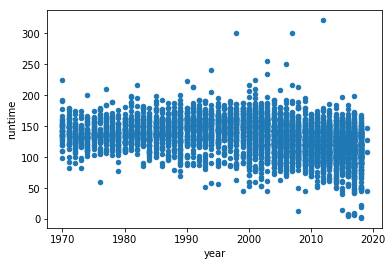

In [91]:
%matplotlib inline

samples.plot(kind='scatter', x='year', y='runtime');

In [32]:
import bokeh.plotting
import bokeh.io

bokeh.io.output_notebook()

Loading BokehJS ...

In [94]:
source = bokeh.plotting.ColumnDataSource(data={
    'year': samples['year'],
    'runtime': samples['runtime'],
    'title': samples['title'],
    'image': samples['image'],
    'rating': samples['rating'],
})

tooltips = '''
<img alt="" src="@image" style="height: 100px"/>
<h3><a href="https://www.imdb.com@link" taget="_blank">@title</a></h3>
<p>
    <label>Duration:</label> @runtime<br/>
    <label>Year:</label> @year
</p>
'''

p = bokeh.plotting.figure(width=960,
                          height=480,
                          title='Bollywood movies duration',
                          x_axis_label='Year',
                          y_axis_label='Runtime',
                          tooltips=tooltips)

p.circle(x='year',
         y='runtime',
         size='rating',
         fill_alpha=.2,
         line_color=None,
         source=source)

avg = samples.groupby('year')['runtime'].median()
p.line(x=avg.index,
       y=avg,
       line_color='red')

q05 = samples.groupby('year')['runtime'].quantile(.05)
q95 = samples.groupby('year')['runtime'].quantile(.95)
p.line(x=q05.index,
       y=q05,
       line_color='purple',
       line_alpha=.4)
p.line(x=q95.index,
       y=q95,
       line_color='purple',
       line_alpha=.4)


bokeh.io.show(p)